In [4]:
X = df.drop('prediction',axis = 1)

In [5]:
y = df['prediction']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
#mean squared error

Using TensorFlow backend.
C:\Users\Ankit\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Ankit\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Ankit\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Ankit\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train: 0.255, Test: 0.259


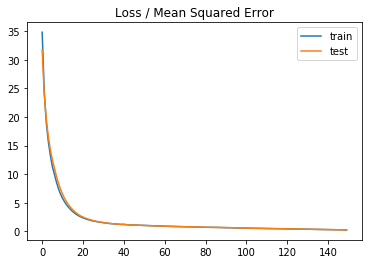

In [8]:
# mlp for regression with mse loss function
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import adam
from matplotlib import pyplot
import tensorflow as tf
# from tensorflow.keras.layers import  Dropout
%matplotlib inline
# # standardize dataset
# X = StandardScaler().fit_transform(X)
# y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10, random_state=101)
# # split into train and test
# n_train = 400
trainX, testX = X_train, X_test
trainy, testy = y_train, y_test
# define model
model = Sequential()
model.add(Dense(35, input_dim=300, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=tf.keras.regularizers.l1(0.027)))
model.add(Dense(1, activation='linear'))
opt = adam(lr=0.007)
model.compile(loss='mean_squared_logarithmic_error', optimizer=opt)
# fit model
# model = tf.keras.layers.Dropout(0.2)(model)
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=150, verbose=0)
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 35)                10535     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 36        
Total params: 10,571
Trainable params: 10,571
Non-trainable params: 0
_________________________________________________________________


In [469]:
model.predict(testX)

array([[162.75146],
       [151.50139],
       [155.3321 ],
       [158.67656],
       [151.41573],
       [154.4763 ],
       [155.77385],
       [158.97722],
       [154.92319],
       [161.4363 ],
       [154.85971],
       [165.7712 ],
       [152.89317],
       [156.19144],
       [159.28343],
       [152.13078],
       [162.68411],
       [160.30142],
       [152.42526],
       [152.1954 ],
       [151.62784],
       [152.07858],
       [164.87306],
       [157.25246],
       [158.15411],
       [153.04169],
       [152.0335 ],
       [159.03221],
       [156.83546],
       [156.05266],
       [151.72386],
       [155.62827],
       [157.19202],
       [158.28992],
       [151.59874],
       [154.05344],
       [161.24487],
       [162.09244],
       [156.13434],
       [157.12901],
       [164.66698],
       [151.78601],
       [159.86244],
       [158.68507]], dtype=float32)

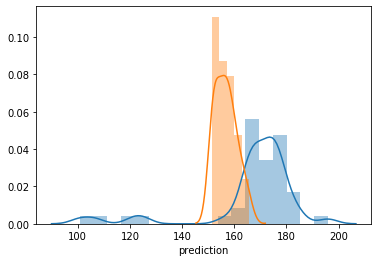

In [470]:
import seaborn as sns
sns.distplot(testy)
sns.distplot(model.predict(testX))

In [471]:
df =  pd.DataFrame(testy)

In [472]:
df['a'] = model.predict(testX)

In [473]:
df

,prediction,a
12,121.31,162.751465
19,100.70,151.501389
268,169.04,155.332108
379,177.52,158.676559
202,164.96,151.415726
395,168.86,154.476303
398,177.90,155.773849
370,169.61,158.977219
216,175.09,154.923187
413,195.90,161.436295


In [474]:
(((df['prediction'] - df['a'])/df['prediction'])**2)**0.5

12     0.341616
19     0.504483
268    0.081093
379    0.106148
202    0.082106
395    0.085181
398    0.124374
370    0.062690
216    0.115180
413    0.175925
209    0.069353
89     0.001034
382    0.120545
374    0.149377
289    0.094312
376    0.087398
408    0.050574
277    0.094649
349    0.112207
283    0.175540
291    0.099330
117    0.088750
130    0.023958
423    0.099871
91     0.102926
156    0.125476
168    0.068308
161    0.032651
69     0.088060
153    0.064433
304    0.159098
307    0.096183
2      0.475704
106    0.090967
31     0.210369
128    0.050986
167    0.078021
39     0.037259
233    0.134846
213    0.105290
267    0.006474
356    0.090012
215    0.092619
81     0.102460
dtype: float64